In [321]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
Earthradius = 6371000
Sunradius = 695508000

We want our planet sample to match that of Sanchis-Ojeda et al. (2014). They present 106 candidates, but their occurrence rate calculations focus on USP planets around G and K stars, that have effective temperatures between 4100 and 6100 K, log(g) between 4.0 and 4.9, and Kepler magnitudes below 16. The "constrain" function that I define applies these to a CSV, where I just have to enter the column numbers for each of these. The file that I open is Table 2 from  Sanchis-Ojeda et al. (2014), where we also constrain for orbital periods between 4 and 24 hours and radii between 0.84 and 4 Earth radii.

For each of these planets, we record the KIC, KOI, orbital period, transit probability, and transit depth along with its uncertainty.

In [322]:
def constrain(teff, logg, mkep):
    if ((row[teff] != "") and (4100 < float(row[teff]) < 6100)):
        if (((row[logg]) != "") and (4.0  < float(row[logg]) < 4.9)):
            if ((row[mkep] != "") and (float(row[mkep]) < 16)):
                return True

In [323]:
kepid = []
koi = []
per = []
adivr = []
delta = []
derror = []

with open('USPCandidates.csv', encoding='latin-1') as File:
    reader = csv.reader(File, delimiter=',')
    rownum = 0
    for row in reader:
        if rownum > 0:
            if constrain(3,6,2):
                if ((row[12] != "") and (4 < (float(row[12])*24) < 24)):
                    if ((row[23] != "") and (.84 < (float(row[23])) < 4)):
                        kepid.append(int(row[0]))
                        koi.append(int(round(float(row[1]))))
                        per.append(float(row[12]))
                        adivr.append(float(row[20]))
                        delta.append(float(row[14]))
                        derror.append(float(row[15]))

        rownum += 1 
        
print(len(kepid))

72


In [324]:
df = pd.DataFrame(zip(kepid, koi, per, adivr, delta, derror), 
                  columns = ['kepid', 'koi', 'per', 'adivr', 'delta', 'derror'])

Removing false positives

In [325]:
falsepositives = [4929299, 10527135, 5642620, 12170648, 3834322,6750902,7269881,10186945,12115188, 10585738]

In [326]:
candidates = [i not in falsepositives for i in df.kepid.values]
df = df[candidates]

In [327]:
df

,kepid,koi,per,adivr,delta,derror
0,2718885,0,0.197333,3.43,96.0,14.0
1,3112129,4144,0.487657,3.67,107.0,6.0
2,4665571,2393,0.766690,5.28,259.0,13.0
4,8435766,0,0.355008,3.37,229.0,1.0
5,9642018,4430,0.252556,3.74,223.0,23.0
...,...,...,...,...,...,...
63,5980208,2742,0.789161,6.41,225.0,12.0
66,8416523,4441,0.341842,2.72,279.0,6.0
67,9353742,3867,0.938751,5.15,272.0,7.0
68,9475552,2694,0.843380,4.58,337.0,7.0


In [328]:
len(df)

62

In [329]:
berger = pd.read_csv('GKSPCPapTable2_Final.txt', delimiter = '&')

Finding planets that aren't in berger and removing them

In [330]:
berger

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,iso_age,unReAgeFlag,iso_age_err1,iso_age_err2,iso_dis,iso_dis_err1,iso_dis_err2,iso_avs,iso_gof,TAMS\\
0,757076,1.396,0.179,-0.218,5052.2,103.9,-86.6,3.373,0.067,-0.081,...,2.47,NaN,1.82,-0.73,651.5,22.6,-21.6,0.371,1.0000,2.69\\
1,757099,0.873,0.054,-0.039,5364.9,102.7,-84.9,4.318,0.037,-0.029,...,15.20,NaN,3.00,-3.98,367.8,7.1,-6.9,0.340,1.0000,17.18\\
2,757137,1.669,0.309,-0.300,4628.7,84.8,-76.2,2.388,0.083,-0.086,...,1.51,NaN,1.06,-0.58,568.4,12.2,-11.6,0.344,1.0000,1.66\\
3,757280,1.715,0.086,-0.089,6856.8,144.4,-139.9,3.834,0.033,-0.032,...,1.24,NaN,0.20,-0.16,822.0,19.4,-21.0,0.496,1.0000,1.62\\
4,757450,0.914,0.062,-0.057,5301.2,111.0,-103.1,4.432,0.045,-0.044,...,9.46,NaN,5.36,-5.15,829.6,24.0,-23.4,0.465,1.0000,16.1\\
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186296,12984214,0.933,0.186,-0.074,5305.6,124.9,-128.8,4.215,0.226,-0.340,...,10.66,NaN,4.89,-6.11,634.4,414.8,-164.0,0.205,1.0000,14.55\\
186297,12984227,1.073,0.321,-0.181,3455.0,73.1,-61.9,0.632,0.133,-0.132,...,7.97,NaN,6.96,-4.73,3673.5,499.8,-437.5,0.310,1.0000,7.98\\
186298,12984307,1.156,0.074,-0.093,5892.6,105.7,-107.3,4.123,0.033,-0.045,...,5.33,NaN,2.03,-1.46,558.6,11.8,-11.3,0.217,1.0000,6.08\\
186299,12984404,1.564,0.358,-0.337,4612.4,93.8,-76.0,2.501,0.116,-0.095,...,2.32,NaN,2.88,-0.98,1419.1,42.2,-32.4,0.310,0.9998,2.44\\


In [331]:
in_berger = [i in berger.KIC.values for i in df.kepid.values]

In [332]:
df = df[in_berger]
len(df)

58

## SNR Function

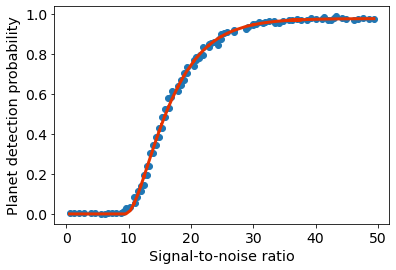

1.8326544798203341 9.656002130909627 4.061402030356385 0.9765401508228847
Power_divergenceResult(statistic=0.10726864454939301, pvalue=1.0)
0.025607780521583547


In [333]:
from scipy.optimize import curve_fit
from scipy import stats

snr = []
prob = []   

with open('SNRProb.csv') as File:
     reader = csv.reader(File, delimiter=',')
     rownum = 0
     for row in reader:
         if rownum > 5:
             snr.append(float(row[0]))
             prob.append(float(row[1]))
         rownum += 1
         

def Logistic(x,a,b,c,d):
    return (((a-d)/(1+(x/c)**b)) + d)

pguess = [0,10,10,1]
par, con = curve_fit(Logistic, snr, prob, p0=pguess)
a  = par[0]
b = par[1]
c = par[2]
d = par[3]
logisticfit = Logistic(snr,0,b,c,d)  


def Gamma(x,a,b,c,d):
    return d*stats.gamma.cdf(x,a,b,c)

pguess2 = [2,5,3,0.95]
par2, con2 = curve_fit(Gamma,snr,prob,p0=pguess2)
a2  = par2[0]
b2 = par2[1]
c2 = par2[2]
d2 = par2[3]
gammafit = Gamma(snr,a2,b2,c2,d2)

plt.plot(snr, prob,'o', color = 'tab:blue')
#plt.plot(snr, logisticfit,color = (0.9, 0.2, 0), label = 'Logistic fit', linewidth  = 3)
plt.plot(snr,gammafit,color = (0.9, 0.2, 0), linewidth = 3)
plt.xlabel('Signal-to-noise ratio', fontsize = 'x-large')
plt.ylabel('Planet detection probability', fontsize = 'x-large')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

print(a2,b2,c2,d2)

gammafit1 = [i for i in gammafit if i != 0]
prob1 = [prob[i] for i in range(0,len(prob)) if gammafit[i] != 0]

print(stats.chisquare(prob1,gammafit1,ddof = 3))
#print(stats.chisquare(prob,logisticfit,ddof = 2))

chisq=np.sum((prob-gammafit)**2)
print(chisq)

In [334]:
def detection_prob(snr):
    return Gamma(snr, 1.8326544798203341,9.656002130909627,4.061402030356385,0.9765401508228847)

In [335]:
kepler_catalog = pd.read_csv('keplerstellar111020.csv')

/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [336]:
sum([i in kepler_catalog.kepid.values for i in berger.KIC.values])

186301

In [337]:
len(berger)

186301

Okay great, looks like all of the Berger targers are in the Kepler catalog, so we can get the dataspan, duty cycle, and CDPP.

In [338]:
in_berger = kepler_catalog[[i in berger.KIC.values for i in kepler_catalog.kepid.values]]

In [339]:
len(in_berger)

926457

In [340]:
in_berger.head()

,st_delivname,kepid,tm_designation,ra,dec,kepmag,teff,teff_prov,logg,logg_prov,...,dens,prov_sec,nconfp,nkoi,ntce,st_quarters,st_vet_date,dutycycle,dataspan,rrmscdpp06p0
0,q1_q12_stellar,10000009,2MASS J19050117+4657496,286.25488,46.963791,11.690,6852,Pinsonneault,4.144,Pinsonneault,...,NaN,NaN,0,0,0,NaN,2013-03-27 0,NaN,NaN,NaN
1,q1_q12_stellar,10000069,2MASS J19050855+4656274,286.28568,46.940960,15.547,5925,Pinsonneault,4.522,Pinsonneault,...,NaN,NaN,0,0,0,NaN,2013-03-27 0,NaN,NaN,NaN
2,q1_q12_stellar,10000083,2MASS J19051088+4658236,286.29535,46.973221,15.276,6142,Pinsonneault,4.384,Pinsonneault,...,NaN,NaN,0,0,0,NaN,2013-03-27 0,NaN,NaN,NaN
3,q1_q12_stellar,10000090,2MASS J19051171+4656443,286.29883,46.945660,15.307,6113,Pinsonneault,4.487,Pinsonneault,...,NaN,NaN,0,0,0,NaN,2013-03-27 0,NaN,NaN,NaN
44,q1_q12_stellar,10000108,2MASS J19051338+4659236,286.30579,46.989899,13.433,5101,Pinsonneault,3.289,Pinsonneault,...,NaN,NaN,0,0,0,NaN,2013-03-27 0,NaN,NaN,NaN


In [345]:
in_berger.columns

Index(['st_delivname', 'kepid', 'tm_designation', 'ra', 'dec', 'kepmag',
       'teff', 'teff_prov', 'logg', 'logg_prov', 'feh', 'feh_prov', 'radius',
       'mass', 'dens', 'prov_sec', 'nconfp', 'nkoi', 'ntce', 'st_quarters',
       'st_vet_date', 'dutycycle', 'dataspan', 'rrmscdpp06p0'],
      dtype='object')

In [341]:
in_berger = in_berger[["q1_q16" in i for i in in_berger.st_delivname.values]]

In [342]:
in_berger = in_berger.dropna(subset = ['dataspan', 'dutycycle', 'rrmscdpp06p0'])

In [343]:
len(in_berger)

184337

In [361]:
mask = (in_berger['teff'] < 6100) & (in_berger['teff'] > 4100) & (in_berger['logg'] < 4.9) & (in_berger['logg'] > 4.0) & (in_berger['kepmag'] < 16.0)
in_berger = in_berger[mask]

So, this is the number of Berger targets we're still considering.

In [362]:
sum([i in in_berger.kepid.values for i in berger.KIC.values])

97940

In [363]:
in_berger

,st_delivname,kepid,tm_designation,ra,dec,kepmag,teff,teff_prov,logg,logg_prov,...,dens,prov_sec,nconfp,nkoi,ntce,st_quarters,st_vet_date,dutycycle,dataspan,rrmscdpp06p0
194437,q1_q16_stellar,10000069,2MASS J19050855+4656274,286.28568,46.940960,15.547,5966,PHO1,4.493,KIC0,...,1.665,DSEP,0,0,0,1.111111e+16,2013-12-03 0,0.8792,1426.742,135.999
194486,q1_q16_stellar,10000151,2MASS J19051857+4654038,286.32739,46.901058,14.093,5057,PHO1,4.495,KIC0,...,1.937,DSEP,0,0,0,1.111111e+16,2013-12-03 0,0.8792,1426.742,99.738
194487,q1_q16_stellar,10000157,2MASS J19051908+4656038,286.32953,46.934391,15.747,6063,PHO1,4.476,KIC0,...,1.519,DSEP,0,0,0,1.111111e+15,2013-12-03 0,0.8798,1388.442,164.138
194488,q1_q16_stellar,10000162,2MASS J19052050+4655041,286.33545,46.917831,15.149,4955,PHO1,4.517,KIC0,...,2.112,DSEP,0,1,1,1.111111e+16,2013-12-03 0,0.8792,1426.742,185.153
194493,q1_q16_stellar,10000198,2MASS J19052775+4658526,286.36566,46.981289,13.833,5075,PHO1,4.497,KIC0,...,1.957,DSEP,0,0,0,1.111111e+16,2013-12-03 0,0.8792,1426.742,147.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393342,q1_q16_stellar,9996785,2MASS J18572967+4658551,284.37366,46.981998,15.239,6061,PHO1,4.486,KIC0,...,1.620,DSEP,0,0,0,1.111111e+16,2013-12-03 0,0.8792,1426.742,129.550
393343,q1_q16_stellar,9996809,2MASS J18573205+4659373,284.38354,46.993710,15.524,6098,PHO1,4.455,KIC0,...,1.431,DSEP,0,0,0,1.111111e+15,2013-12-03 0,0.8799,1388.442,152.045
393345,q1_q16_stellar,9999784,2MASS J19042910+4658254,286.12131,46.973721,15.606,5591,PHO1,4.559,KIC0,...,2.163,DSEP,0,0,0,1.111111e+16,2013-12-03 0,0.8793,1426.742,150.340
393348,q1_q16_stellar,9999901,2MASS J19044516+4659174,286.18817,46.988190,13.252,5071,PHO1,4.584,KIC0,...,2.461,DSEP,0,0,0,1.111111e+16,2013-12-03 0,0.8792,1426.742,60.656


In [365]:
berger[berger.KIC == 2718885]['iso_rad'].values[0]

1.4169999999999998

In [366]:
df['host_radius'] = [berger[berger.KIC == i]['iso_rad'].values[0] for i in df.kepid.values]

/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [367]:
df.head()

,kepid,koi,per,adivr,delta,derror,host_radius
0,2718885,0,0.197333,3.43,96.0,14.0,1.417
1,3112129,4144,0.487657,3.67,107.0,6.0,0.972
2,4665571,2393,0.766690,5.28,259.0,13.0,0.727
4,8435766,0,0.355008,3.37,229.0,1.0,0.744
5,9642018,4430,0.252556,3.74,223.0,23.0,0.799


In [368]:
def T(mass, radius, per): ## transit duration
    per_years = per / 365
    return 13 * (per_years**(1/3)) * radius * (mass**(-1/3))

In [369]:
numstars = np.zeros(len(df))
count = 0
for index, row in berger.iterrows():
    KIC = row['KIC']
    mass = row['iso_mass']
    radius = row['iso_rad']
    try:
        dataspan = in_berger[in_berger.kepid == KIC].dataspan.values[0]
        duty_cycle = in_berger[in_berger.kepid == KIC].dutycycle.values[0]
        time = dataspan * duty_cycle
        cdpp = in_berger[in_berger.kepid == KIC].rrmscdpp06p0.values[0]

        for index, kepid in enumerate(df.kepid.values):
            per = df.per.values[index]
            t = T(mass, radius, per) 
            new_delta = df.delta.values[index] * (df.host_radius.values[index] / radius)
            snr_this_pair = (new_delta / cdpp) * np.sqrt((t * time) / (per * 6))
            if np.isnan(snr_this_pair):
                print(dataspan)
            numstars[index] += detection_prob(snr_this_pair)
    except:
        count += 1


print(count)

88361


In [371]:
len(berger) - len(in_berger)

88361

Okay, that checks out.

In [373]:
df['numstars'] = numstars

/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [375]:
len(df)

58

Now, we need to get the other stellar parameters from the Kepler catalog, and replace them with the updated CKS values from Winn et al. (2017).

In [378]:
def populate_from_data(df_name, berger_name, data_name = berger, kepid_name = 'KIC'):
    df[df_name] = [data_name[data_name[kepid_name] == i][berger_name].values[0] for i in df.kepid.values]

In [379]:
populate_from_data('logg', 'iso_logg')
populate_from_data('logg_errup', 'iso_logg_err1')
populate_from_data('logg_errdown', 'iso_logg_err2')
populate_from_data('teff', 'iso_teff')
populate_from_data('teff_errup', 'iso_teff_err1')
populate_from_data('teff_errdown', 'iso_teff_err2')
populate_from_data('feh', 'iso_feh')
populate_from_data('feh_errup', 'iso_feh_err1')
populate_from_data('feh_errdown', 'iso_feh_err2')

/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Now we will replace the Berger values for spectroscopic parameters with those from Winn et al. (2017) if they are there.

In [382]:
winn2017 = pd.read_csv('ajaa7b7ct1_ascii.csv', header = 2)
winn2017.head()

,ID,Teff(K),Uncertainty,Uncertainty.1,log(g),Uncertainty.2,Uncertainty.3,[Fe/H],Uncertainty.4,Uncertainty.5,Rstar(Rsun),Uncertainty.6,Uncertainty.7,Mstar(Msun),Uncertainty.8,Uncertainty.9,Rp(Re),Uncertainty.10,Uncertainty.11,Porb [hr]
0,KOI 0072,5599,-65,66,4.34,-0.10,0.08,-0.11,-0.04,0.04,1.06,-0.09,0.16,0.91,-0.03,0.04,1.46,-0.17,0.17,20.2
1,KOI 0191,5459,-64,63,4.45,-0.08,0.07,0.10,-0.04,0.04,0.94,-0.06,0.09,0.92,-0.03,0.03,1.35,-0.12,0.12,17.0
2,KOI 0577,5085,-66,64,4.53,-0.04,0.04,0.11,-0.04,0.04,0.82,-0.04,0.04,0.83,-0.03,0.03,0.91,-0.09,0.09,15.4
3,KOI 0717,5619,-68,61,4.25,-0.10,0.09,0.31,-0.04,0.04,1.28,-0.14,0.17,1.05,-0.04,0.06,0.81,-0.11,0.11,21.6
4,KOI 1128,5352,-63,65,4.50,-0.06,0.06,-0.04,-0.04,0.04,0.87,-0.05,0.06,0.86,-0.03,0.03,1.24,-0.10,0.10,23.3


In [387]:
def get_koi_number(str):
    return int(str[3:])

winn2017['KOI'] = winn2017['ID'].apply(get_koi_number)

In [408]:
for index, row in df.iterrows():
    for index2, row2 in winn2017.iterrows():
        if row['koi'] == row2['KOI']:
            df['teff'][index] = winn2017['Teff(K)'][index2]
            df['teff_errup'][index] = winn2017['Uncertainty.1'][index2]
            df['teff_errdown'][index] = winn2017['Uncertainty'][index2]
            df['logg'][index] = winn2017['log(g)'][index2]
            df['logg_errup'][index] = winn2017['Uncertainty.3'][index2]
            df['logg_errdown'][index] = winn2017['Uncertainty.2'][index2]
            df['feh'][index] = winn2017['[Fe/H]'][index2]
            df['feh_errup'][index] = winn2017['Uncertainty.5'][index2]
            df['feh_errdown'][index] = winn2017['Uncertainty.4'][index2]

/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

0


In [413]:
df.head()

,kepid,koi,per,adivr,delta,derror,host_radius,numstars,logg,logg_errup,logg_errdown,teff,teff_errup,teff_errdown,feh,feh_errup,feh_errdown
0,2718885,0,0.197333,3.43,96.0,14.0,1.417,80048.853918,4.113,0.048,-0.048,5549.4,118.3,-112.4,0.033,0.161,-0.164
1,3112129,4144,0.487657,3.67,107.0,6.0,0.972,51999.969769,4.390,0.070,-0.080,6000.0,65.0,-64.0,-0.110,0.040,-0.040
2,4665571,2393,0.766690,5.28,259.0,13.0,0.727,75349.448996,4.590,0.030,-0.040,4836.0,65.0,-65.0,-0.060,0.040,-0.040
4,8435766,0,0.355008,3.37,229.0,1.0,0.744,80990.789899,4.572,0.026,-0.029,5005.3,83.3,-80.2,-0.154,0.106,-0.103
5,9642018,4430,0.252556,3.74,223.0,23.0,0.799,85224.549375,4.550,0.040,-0.050,5104.0,65.0,-66.0,0.100,0.040,-0.040


One of the main new things we want to do is incorporate new Gaia parallaxes into the radius calculations. We used the gaia-kepler.fun crossmatch database created by Megan Bedell.

In [414]:
from astropy.table import Table
data = Table.read('kepler_dr2_1arcsec.fits', format='fits')
data_pd = data.to_pandas()

In [432]:
list(data_pd.kepid.values).index(8895758)

119850

In [433]:
data_pd.parallax.values[119850]

-1.7675291827804935

In [415]:
populate_from_data('parallax', 'parallax', data_pd, 'kepid')
populate_from_data('parallax_error', 'parallax_error', data_pd, 'kepid')

/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now I will get the photometric band data from MAST.

In [416]:
mast = pd.read_csv('kepler_search.csv')

In [417]:
mast.columns

Index(['Kepler ID', 'Investigation ID', 'Dataset Name', 'Quarter',
       'RA (J2000)', 'Dec (J2000)', 'Target Type', 'Archive Class', 'Ref',
       'Actual Start Time', 'Actual End Time', 'Release Date', 'R Mag',
       'J Mag', 'KEP Mag', '2MASS ID', '2MASS conflict flag', 'Teff', 'Log G',
       'Metallicity', 'E(B-V)', 'Radius', 'Total PM', 'G-R color', 'Module',
       'Output', 'Channel', 'Skygroup_ID', 'Condition flag', 'U Mag', 'G Mag',
       'R Mag.1', 'I Mag', 'Z Mag', 'J Mag.1', 'H Mag', 'K Mag', 'KEP Mag.1',
       'Kepmag Source', 'Parallax'],
      dtype='object')

Okay, so it looks like there are 2 columns for Kepler and J magnitude, but it looks like they're the same.

In [418]:
print(sum((mast['J Mag'] == mast['J Mag.1']) == False))
sum((mast['KEP Mag'] == mast['KEP Mag.1']) == False)

0


0

In [419]:
mast['Kepler ID'][1:] = mast['Kepler ID'][1:].astype(int)

In [420]:
populate_from_data('kepmag', 'KEP Mag', mast, 'Kepler ID')
populate_from_data('jmag', 'J Mag', mast, 'Kepler ID')
populate_from_data('hmag', 'H Mag', mast, 'Kepler ID')
populate_from_data('kmag', 'K Mag', mast, 'Kepler ID')
populate_from_data('gmag', 'G Mag', mast, 'Kepler ID')
populate_from_data('rmag', 'R Mag', mast, 'Kepler ID')
populate_from_data('imag', 'I Mag', mast, 'Kepler ID')
populate_from_data('zmag', 'Z Mag', mast, 'Kepler ID')

/Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [421]:
df.to_csv("isochrones_input.csv", index = False)

In [422]:
df

,kepid,koi,per,adivr,delta,derror,host_radius,numstars,logg,logg_errup,...,parallax,parallax_error,kepmag,jmag,hmag,kmag,gmag,rmag,imag,zmag
0,2718885,0,0.197333,3.43,96.0,14.0,1.417,80048.853918,4.113,0.048,...,0.821435,0.024400,14.659,13.349,12.99,12.936,15.231,14.607,14.414,14.325
1,3112129,4144,0.487657,3.67,107.0,6.0,0.972,51999.969769,4.390,0.070,...,1.158976,0.019811,14.374,13.313,13,12.968,14.833,14.326,14.177,14.123
2,4665571,2393,0.766690,5.28,259.0,13.0,0.727,75349.448996,4.590,0.030,...,1.970339,0.032467,14.903,13.31,12.836,12.721,15.695,14.841,14.564,14.376
4,8435766,0,0.355008,3.37,229.0,1.0,0.744,80990.789899,4.572,0.026,...,8.011261,0.021162,11.551,10.183,9.675,9.586,12.182,11.46,11.281,11.129
5,9642018,4430,0.252556,3.74,223.0,23.0,0.799,85224.549375,4.550,0.040,...,1.121816,0.027226,15.544,14.188,13.679,13.635,16.215,15.471,15.256,15.115
9,11187332,0,0.305984,5.42,126.0,13.0,0.950,68671.589240,4.428,0.046,...,0.952919,0.025964,15.168,13.954,13.59,13.48,15.684,15.102,14.947,14.878
10,11550689,0,0.301601,2.55,412.0,6.0,0.647,90699.214979,4.617,0.033,...,3.748304,0.019373,14.604,12.631,11.976,11.804,15.875,14.604,14.06,13.803
11,1717722,3145,0.977308,5.22,266.0,21.0,0.656,68161.223477,4.629,0.022,...,1.659280,0.034851,15.689,14.057,13.46,13.358,16.554,15.617,15.319,15.128
12,3444588,1202,0.928311,5.70,397.0,21.0,0.652,83766.208595,4.624,0.025,...,1.957913,0.036163,15.854,13.936,13.305,13.105,17.024,15.839,15.352,15.057
13,4055304,2119,0.571039,3.98,243.0,5.0,0.792,79809.643207,4.540,0.040,...,2.303474,0.022842,14.098,12.682,12.24,12.151,14.796,14.022,13.799,13.669


In [427]:
df

,kepid,koi,per,adivr,delta,derror,host_radius,numstars,logg,logg_errup,...,parallax,parallax_error,kepmag,jmag,hmag,kmag,gmag,rmag,imag,zmag
0,2718885,0,0.197333,3.43,96.0,14.0,1.417,80048.853918,4.113,0.048,...,0.821435,0.024400,14.659,13.349,12.99,12.936,15.231,14.607,14.414,14.325
1,3112129,4144,0.487657,3.67,107.0,6.0,0.972,51999.969769,4.390,0.070,...,1.158976,0.019811,14.374,13.313,13,12.968,14.833,14.326,14.177,14.123
2,4665571,2393,0.766690,5.28,259.0,13.0,0.727,75349.448996,4.590,0.030,...,1.970339,0.032467,14.903,13.31,12.836,12.721,15.695,14.841,14.564,14.376
4,8435766,0,0.355008,3.37,229.0,1.0,0.744,80990.789899,4.572,0.026,...,8.011261,0.021162,11.551,10.183,9.675,9.586,12.182,11.46,11.281,11.129
5,9642018,4430,0.252556,3.74,223.0,23.0,0.799,85224.549375,4.550,0.040,...,1.121816,0.027226,15.544,14.188,13.679,13.635,16.215,15.471,15.256,15.115
9,11187332,0,0.305984,5.42,126.0,13.0,0.950,68671.589240,4.428,0.046,...,0.952919,0.025964,15.168,13.954,13.59,13.48,15.684,15.102,14.947,14.878
10,11550689,0,0.301601,2.55,412.0,6.0,0.647,90699.214979,4.617,0.033,...,3.748304,0.019373,14.604,12.631,11.976,11.804,15.875,14.604,14.06,13.803
11,1717722,3145,0.977308,5.22,266.0,21.0,0.656,68161.223477,4.629,0.022,...,1.659280,0.034851,15.689,14.057,13.46,13.358,16.554,15.617,15.319,15.128
12,3444588,1202,0.928311,5.70,397.0,21.0,0.652,83766.208595,4.624,0.025,...,1.957913,0.036163,15.854,13.936,13.305,13.105,17.024,15.839,15.352,15.057
13,4055304,2119,0.571039,3.98,243.0,5.0,0.792,79809.643207,4.540,0.040,...,2.303474,0.022842,14.098,12.682,12.24,12.151,14.796,14.022,13.799,13.669
